# How Does a Bike-Share Navigate Speedy Success?


### Cyclistic is a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, the team wants to understand how casual riders and annual members use Cyclistic bikes differently. You need to design a new marketing strategy to convert casual riders into annual members. 


# Introduction

### This report presents a comprehensive analysis of bike rental data, focusing on different aspects such as time patterns (month, weekday), user types (Member vs. Casual), and overall usage trends. The analysis is backed by visualizations that provide clear insights into the bike rental patterns.

### For the data analysis, we have data of six months. From this data, data driven decision needs to be implemented. Let's start the analysis process.

In [1]:
# importing the packages required for data analysis

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import datetime

In [2]:
# Loading the datasets from January 2023 to June 2023 and giving it a relatable name.

data_2023_01 = pd.read_csv(r'C:\Users\Bisal\Desktop\Data\202301-divvy-tripdata.csv')

data_2023_02 = pd.read_csv(r'C:\Users\Bisal\Desktop\Data\202302-divvy-tripdata.csv')

data_2023_03 = pd.read_csv(r'C:\Users\Bisal\Desktop\Data\202303-divvy-tripdata.csv')

data_2023_04 = pd.read_csv(r'C:\Users\Bisal\Desktop\Data\202304-divvy-tripdata.csv')

data_2023_05 = pd.read_csv(r'C:\Users\Bisal\Desktop\Data\202305-divvy-tripdata.csv')

data_2023_06 = pd.read_csv(r'C:\Users\Bisal\Desktop\Data\202306-divvy-tripdata.csv')

In [3]:
# Exploring the dataset. Head shows the first 5 rows of data.

data_2023_01.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [4]:
# Similarly, checking other datasets too

data_2023_02.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CBCD0D7777F0E45F,classic_bike,2023-02-14 11:59:42,2023-02-14 12:13:38,Southport Ave & Clybourn Ave,TA1309000030,Clark St & Schiller St,TA1309000024,41.920771,-87.663712,41.907993,-87.631501,casual
1,F3EC5FCE5FF39DE9,electric_bike,2023-02-15 13:53:48,2023-02-15 13:59:08,Clarendon Ave & Gordon Ter,13379,Sheridan Rd & Lawrence Ave,TA1309000041,41.957879,-87.649584,41.969517,-87.654691,casual
2,E54C1F27FA9354FF,classic_bike,2023-02-19 11:10:57,2023-02-19 11:35:01,Southport Ave & Clybourn Ave,TA1309000030,Aberdeen St & Monroe St,13156,41.920771,-87.663712,41.880419,-87.655519,member
3,3D561E04F739CC45,electric_bike,2023-02-26 16:12:05,2023-02-26 16:39:55,Southport Ave & Clybourn Ave,TA1309000030,Franklin St & Adams St (Temp),TA1309000008,41.920873,-87.663733,41.879434,-87.635504,member
4,0CB4B4D53B2DBE05,electric_bike,2023-02-20 11:55:23,2023-02-20 12:05:48,Prairie Ave & Garfield Blvd,TA1307000160,Cottage Grove Ave & 63rd St,KA1503000054,41.794827,-87.618795,41.780531,-87.605970,member


In [5]:
data_2023_03.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6842AA605EE9FBB3,electric_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,Clark St & Armitage Ave,13146,Larrabee St & Webster Ave,13193,41.918413,-87.636451,41.921822,-87.644140,member
1,F984267A75B99A8C,electric_bike,2023-03-04 14:07:06,2023-03-04 14:15:31,Public Rack - Kedzie Ave & Argyle St,491,NaN,NaN,41.970000,-87.710000,41.950000,-87.710000,member
2,FF7CF57CFE026D02,classic_bike,2023-03-31 12:28:09,2023-03-31 12:38:47,Orleans St & Chestnut St (NEXT Apts),620,Clark St & Randolph St,TA1305000030,41.898203,-87.637536,41.884576,-87.631890,member
3,6B61B916032CB6D6,classic_bike,2023-03-22 14:09:08,2023-03-22 14:24:51,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Kingsbury St,13154,41.888716,-87.644448,41.910522,-87.653106,member
4,E55E61A5F1260040,electric_bike,2023-03-09 07:15:00,2023-03-09 07:26:00,Walsh Park,18067,Sangamon St & Lake St,TA1306000015,41.914480,-87.668013,41.885779,-87.651025,member


In [6]:
data_2023_04.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02 08:37:28,2023-04-02 08:41:37,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.60,member
1,34E4ED3ADF1D821B,electric_bike,2023-04-19 11:29:02,2023-04-19 11:52:12,NaN,NaN,NaN,NaN,41.87,-87.65,41.93,-87.68,member
2,5296BF07A2F77CB5,electric_bike,2023-04-19 08:41:22,2023-04-19 08:43:22,NaN,NaN,NaN,NaN,41.93,-87.66,41.93,-87.66,member
3,40759916B76D5D52,electric_bike,2023-04-19 13:31:30,2023-04-19 13:35:09,NaN,NaN,NaN,NaN,41.92,-87.65,41.91,-87.65,member
4,77A96F460101AC63,electric_bike,2023-04-19 12:05:36,2023-04-19 12:10:26,NaN,NaN,NaN,NaN,41.91,-87.65,41.91,-87.63,member


In [7]:
# Tail shows the last 5 rows of the dataset.

data_2023_05.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
604822,48BDA26F34445546,electric_bike,2023-05-18 10:26:43,2023-05-18 10:48:00,Clark St & Elmdale Ave,KA1504000148,NaN,NaN,41.990876,-87.669721,42.00,-87.66,member
604823,573025E5EDE10DE1,electric_bike,2023-05-17 14:32:48,2023-05-17 14:45:37,State St & 33rd St,13216,NaN,NaN,41.834734,-87.625798,41.83,-87.62,member
604824,D88D48898C6FB63E,electric_bike,2023-05-17 07:59:29,2023-05-17 08:04:54,Columbus Dr & Randolph St,13263,NaN,NaN,41.884422,-87.619393,41.88,-87.63,member
604825,4692DCD2F87497F5,electric_bike,2023-05-18 08:34:48,2023-05-18 08:38:40,Public Rack - Karlov Ave & Lawrence Ave,1127.0,NaN,NaN,41.970000,-87.730000,41.97,-87.74,member
604826,6ACB7E383473D019,electric_bike,2023-05-29 21:16:58,2023-05-29 21:24:35,State St & 33rd St,13216,NaN,NaN,41.834715,-87.625764,41.84,-87.65,member


In [8]:
data_2023_06.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
719613,D7BBF4BCBB72DA32,classic_bike,2023-06-30 12:58:56,2023-06-30 13:41:25,Fairbanks Ct & Grand Ave,TA1305000003,California Ave & Milwaukee Ave,13084,41.891847,-87.620580,41.922695,-87.697153,casual
719614,9A1685F9A39646CA,electric_bike,2023-06-29 19:56:44,2023-06-29 20:09:15,Fairbanks Ct & Grand Ave,TA1305000003,NaN,NaN,41.891970,-87.620198,41.890000,-87.610000,casual
719615,CD4CC5A60881C7AF,electric_bike,2023-06-25 00:27:20,2023-06-25 00:39:09,Clark St & Lincoln Ave,13179,NaN,NaN,41.915745,-87.634604,41.920000,-87.650000,casual
719616,FF6594685CFE2056,electric_bike,2023-06-24 21:26:57,2023-06-24 21:28:44,Fairbanks Ct & Grand Ave,TA1305000003,NaN,NaN,41.891725,-87.620607,41.890000,-87.620000,casual
719617,66EF9F3C318208B9,classic_bike,2023-06-24 21:30:30,2023-06-25 22:30:07,Fairbanks Ct & Grand Ave,TA1305000003,NaN,NaN,41.891847,-87.620580,NaN,NaN,casual


In [9]:
# There are 13 datasets. Therefore, we need to combine these datasets to make a single dataset. 

dataset = pd.concat([ data_2023_01, data_2023_02, data_2023_03, data_2023_04, data_2023_05, data_2023_06])

In [10]:
# putting the dataset into a pandas data frame and then viewing it at the end.

df = dataset
print(df)

                 ride_id  rideable_type           started_at  \
0       F96D5A74A3E41399  electric_bike  2023-01-21 20:05:42   
1       13CB7EB698CEDB88   classic_bike  2023-01-10 15:37:36   
2       BD88A2E670661CE5  electric_bike  2023-01-02 07:51:57   
3       C90792D034FED968   classic_bike  2023-01-22 10:52:58   
4       3397017529188E8A   classic_bike  2023-01-12 13:58:01   
...                  ...            ...                  ...   
719613  D7BBF4BCBB72DA32   classic_bike  2023-06-30 12:58:56   
719614  9A1685F9A39646CA  electric_bike  2023-06-29 19:56:44   
719615  CD4CC5A60881C7AF  electric_bike  2023-06-25 00:27:20   
719616  FF6594685CFE2056  electric_bike  2023-06-24 21:26:57   
719617  66EF9F3C318208B9   classic_bike  2023-06-24 21:30:30   

                   ended_at           start_station_name start_station_id  \
0       2023-01-21 20:16:33  Lincoln Ave & Fullerton Ave     TA1309000058   
1       2023-01-10 15:46:05        Kimbark Ave & 53rd St     TA1309000037   


In [11]:
# Viewing the combined dataset to see first 10 rows.

df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
5,58E68156DAE3E311,electric_bike,2023-01-31 07:18:03,2023-01-31 07:21:16,Lakeview Ave & Fullerton Pkwy,TA1309000019,Hampden Ct & Diversey Ave,202480.0,41.926069,-87.638858,41.930000,-87.640000,member
6,2F7194B6012A98D4,electric_bike,2023-01-15 21:18:36,2023-01-15 21:32:36,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799554,-87.594617,41.809835,-87.599383,member
7,DB1CF84154D6A049,classic_bike,2023-01-25 10:49:01,2023-01-25 10:58:22,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
8,34EAB943F88C4C5D,electric_bike,2023-01-25 20:49:47,2023-01-25 21:02:14,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799587,-87.594670,41.809835,-87.599383,member
9,BC8AB1AA51DA9115,classic_bike,2023-01-06 16:37:19,2023-01-06 16:49:52,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [12]:
# Viewing the combined dataset to see last 10 rows.

df.tail(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
719608,50D571C70A6F0C04,electric_bike,2023-06-24 21:16:24,2023-06-24 22:41:04,Clinton St & Washington Blvd,WL-012,NaN,NaN,41.883562,-87.641328,41.890000,-87.630000,casual
719609,A5ACBE3821F73016,electric_bike,2023-06-25 13:29:06,2023-06-25 13:43:47,Clark St & Lincoln Ave,13179,NaN,NaN,41.915821,-87.634670,41.930000,-87.640000,casual
719610,D3694ABFD7ECDECB,electric_bike,2023-06-24 23:38:24,2023-06-25 00:23:30,Michigan Ave & 14th St,TA1307000124,NaN,NaN,41.864071,-87.623804,41.910000,-87.640000,casual
719611,04D745E887D17A4D,electric_bike,2023-06-22 21:32:47,2023-06-22 21:53:17,Ashland Ave & Wellington Ave,13269,NaN,NaN,41.936103,-87.669940,41.940000,-87.680000,casual
719612,CDA9ABCD7DA3AE4C,electric_bike,2023-06-23 06:36:30,2023-06-23 07:01:59,Clark St & Lincoln Ave,13179,NaN,NaN,41.915710,-87.634590,41.960000,-87.630000,casual
719613,D7BBF4BCBB72DA32,classic_bike,2023-06-30 12:58:56,2023-06-30 13:41:25,Fairbanks Ct & Grand Ave,TA1305000003,California Ave & Milwaukee Ave,13084,41.891847,-87.620580,41.922695,-87.697153,casual
719614,9A1685F9A39646CA,electric_bike,2023-06-29 19:56:44,2023-06-29 20:09:15,Fairbanks Ct & Grand Ave,TA1305000003,NaN,NaN,41.891970,-87.620198,41.890000,-87.610000,casual
719615,CD4CC5A60881C7AF,electric_bike,2023-06-25 00:27:20,2023-06-25 00:39:09,Clark St & Lincoln Ave,13179,NaN,NaN,41.915745,-87.634604,41.920000,-87.650000,casual
719616,FF6594685CFE2056,electric_bike,2023-06-24 21:26:57,2023-06-24 21:28:44,Fairbanks Ct & Grand Ave,TA1305000003,NaN,NaN,41.891725,-87.620607,41.890000,-87.620000,casual
719617,66EF9F3C318208B9,classic_bike,2023-06-24 21:30:30,2023-06-25 22:30:07,Fairbanks Ct & Grand Ave,TA1305000003,NaN,NaN,41.891847,-87.620580,NaN,NaN,casual


In [13]:
# Checking the data types of the dataset using dtypes.

df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

# Time to start cleaning the dataset.

In [14]:
# Checking to see if there are any null values in the dataset.

df.isnull().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

In [15]:
#  There are many null columns in the dataset. We can use sum function to add null values.

df.isnull().values.sum()

1481953

In [16]:
# To see how many null values are in specific columns.

df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    357417
start_station_id      357549
end_station_name      380963
end_station_id        381104
start_lat                  0
start_lng                  0
end_lat                 2460
end_lng                 2460
member_casual              0
dtype: int64

#### These columns had NULL values, therefore I opted to remove them as my analysis did not require them. My main objective was to compare and identify trends regarding the average ride duration, day-to-day variations, and the total number of rides across the two types of membership.

In [17]:
# We can see there are null values in some of the entire column. There's no point of having it. Therefore, we need to remove it.

to_drop = ['start_station_name',
           'start_station_id',
           'end_station_name',
           'end_station_id',
           'start_lat',
           'start_lng',
           'end_lat',
           'end_lng']

df.drop(to_drop, inplace=True, axis=1)

In [18]:
# Now, after dropping those columns. Let's check our dataset again.

df.isnull().any()

ride_id          False
rideable_type    False
started_at       False
ended_at         False
member_casual    False
dtype: bool

In [19]:
# Having a peek of the dataset after removing null values.

df.head(20)


,ride_id,rideable_type,started_at,ended_at,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,member
5,58E68156DAE3E311,electric_bike,2023-01-31 07:18:03,2023-01-31 07:21:16,member
6,2F7194B6012A98D4,electric_bike,2023-01-15 21:18:36,2023-01-15 21:32:36,member
7,DB1CF84154D6A049,classic_bike,2023-01-25 10:49:01,2023-01-25 10:58:22,member
8,34EAB943F88C4C5D,electric_bike,2023-01-25 20:49:47,2023-01-25 21:02:14,member
9,BC8AB1AA51DA9115,classic_bike,2023-01-06 16:37:19,2023-01-06 16:49:52,member


In [20]:
# Having a peek of the dataset after removing null values.

df.tail(20)

,ride_id,rideable_type,started_at,ended_at,member_casual
719598,A0A0B105EA4FBDE0,electric_bike,2023-06-12 09:06:02,2023-06-12 09:23:58,member
719599,4CA5788FB7BBB534,electric_bike,2023-06-29 17:55:46,2023-06-29 18:01:15,member
719600,B986F4118F09316A,electric_bike,2023-06-09 16:16:00,2023-06-09 16:30:47,member
719601,2CF011F331FAC616,electric_bike,2023-06-12 16:48:27,2023-06-12 16:52:19,member
719602,AF036A8A8EBF731E,docked_bike,2023-06-10 11:56:08,2023-06-15 04:57:09,casual
719603,A04CE14C2195E790,electric_bike,2023-06-23 14:03:41,2023-06-23 14:07:29,member
719604,6B5529395EB391D4,electric_bike,2023-06-20 18:34:37,2023-06-20 18:48:03,casual
719605,ED79A3138259D178,electric_bike,2023-06-19 21:25:36,2023-06-19 21:29:02,casual
719606,0EE85D6F1AFC19BC,electric_bike,2023-06-20 08:52:29,2023-06-20 09:03:28,casual
719607,D1155E659D1D05EB,electric_bike,2023-06-19 22:19:51,2023-06-19 22:28:47,casual


In [21]:
# To find out if there are any duplicate data into the dataset.

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
719613    False
719614    False
719615    False
719616    False
719617    False
Length: 2390459, dtype: bool

# Let's take a deep dive into the dataset by finding stats of our dataset.

In [22]:
# Finding out unique rides in our dataset.

df.ride_id.nunique()

2390459

In [23]:
# Finding out number of bikes in our dataset.

df.rideable_type.nunique()

3

In [24]:
# Finding out how many rows and columns are there in our datset.

df.shape

(2390459, 5)

In [25]:
df.dtypes

ride_id          object
rideable_type    object
started_at       object
ended_at         object
member_casual    object
dtype: object

#### We can see that our column of started_at and ended_at has object column. We cannot use object to perform data analysis. Therefore, we need to change it to date and time to have a broader aspect of those columns.

In [26]:
# Changing object data type into date and time. 

df['started_at']= pd.to_datetime(df['started_at'],format="mixed", utc="True")

df['ended_at']= pd.to_datetime(df['ended_at'],format="mixed", utc="True")

# df['started_at'] = pd.to_datetime(tripdata['started_at'])

# df['started_at'] = df['started_at'].astype('datetime64') 

In [27]:
# checking to see if data types changed

df.dtypes

ride_id                       object
rideable_type                 object
started_at       datetime64[ns, UTC]
ended_at         datetime64[ns, UTC]
member_casual                 object
dtype: object

In [28]:
# since now data type is changed, let's find out the ride length between the rides by creating a ride length column.
# Disclaimer, ride length is time here. 

df['ride_length'] = (df['ended_at'] - df['started_at'])/pd.Timedelta(minutes=1)

In [29]:
# let's check if ridelength is created or not.

df.dtypes

ride_id                       object
rideable_type                 object
started_at       datetime64[ns, UTC]
ended_at         datetime64[ns, UTC]
member_casual                 object
ride_length                  float64
dtype: object

In [30]:
# since ride length is created, we can see that its has float datatype. Let's change it to integer.

df['ride_length'] = df['ride_length'].astype('int32')

In [31]:
# checking the data type again

df.dtypes

ride_id                       object
rideable_type                 object
started_at       datetime64[ns, UTC]
ended_at         datetime64[ns, UTC]
member_casual                 object
ride_length                    int32
dtype: object

In [32]:
# Now, let's view our dataset.

df.head(50)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42+00:00,2023-01-21 20:16:33+00:00,member,10
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36+00:00,2023-01-10 15:46:05+00:00,member,8
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57+00:00,2023-01-02 08:05:11+00:00,casual,13
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58+00:00,2023-01-22 11:01:44+00:00,member,8
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01+00:00,2023-01-12 14:13:20+00:00,member,15
5,58E68156DAE3E311,electric_bike,2023-01-31 07:18:03+00:00,2023-01-31 07:21:16+00:00,member,3
6,2F7194B6012A98D4,electric_bike,2023-01-15 21:18:36+00:00,2023-01-15 21:32:36+00:00,member,14
7,DB1CF84154D6A049,classic_bike,2023-01-25 10:49:01+00:00,2023-01-25 10:58:22+00:00,member,9
8,34EAB943F88C4C5D,electric_bike,2023-01-25 20:49:47+00:00,2023-01-25 21:02:14+00:00,member,12
9,BC8AB1AA51DA9115,classic_bike,2023-01-06 16:37:19+00:00,2023-01-06 16:49:52+00:00,member,12


In [33]:
df.tail(50)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
719568,AF4ED3F726541FA5,electric_bike,2023-06-30 16:57:53+00:00,2023-06-30 17:02:31+00:00,casual,4
719569,44D2DF6BFE2C4C33,electric_bike,2023-06-29 19:57:35+00:00,2023-06-29 20:08:03+00:00,casual,10
719570,753F9EF90C9112F3,electric_bike,2023-06-30 10:56:47+00:00,2023-06-30 11:09:30+00:00,casual,12
719571,3AE5656925B9AA07,electric_bike,2023-06-27 16:12:12+00:00,2023-06-27 16:26:42+00:00,casual,14
719572,2C89E7EED45CBCA8,electric_bike,2023-06-08 09:39:39+00:00,2023-06-08 09:50:02+00:00,member,10
719573,A266C6FA4EA2D673,electric_bike,2023-06-22 16:48:38+00:00,2023-06-22 17:01:09+00:00,member,12
719574,4E559657970F721C,electric_bike,2023-06-19 06:42:07+00:00,2023-06-19 06:43:55+00:00,member,1
719575,7DCA459197809C16,electric_bike,2023-06-21 17:20:08+00:00,2023-06-21 17:31:04+00:00,member,10
719576,D9E50AEA4B3020F6,docked_bike,2023-06-22 19:36:17+00:00,2023-06-22 20:06:38+00:00,casual,30
719577,BED2B26D7D68EBE5,electric_bike,2023-06-08 14:19:38+00:00,2023-06-08 14:25:31+00:00,member,5


In [34]:
# let's sort the the "ride_length" column in Ascending order to see long and short ride length

df.sort_values(by = 'ride_length')

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
367827,8B6E5BA70093AAB7,electric_bike,2023-06-02 19:29:06+00:00,2023-06-02 18:28:51+00:00,casual,-60
367872,D12C3767DC204369,electric_bike,2023-06-02 19:29:42+00:00,2023-06-02 18:40:44+00:00,casual,-48
638607,318E29DFACCD7C24,electric_bike,2023-06-02 23:26:45+00:00,2023-06-02 23:10:38+00:00,member,-16
363359,DFC43BD5CB34ACBF,electric_bike,2023-04-06 23:09:31+00:00,2023-04-06 23:00:35+00:00,member,-8
189347,4EFC95304E050AA1,electric_bike,2023-02-04 13:08:08+00:00,2023-02-04 13:04:52+00:00,member,-3
...,...,...,...,...,...,...
533226,B15E7D0761667BE5,docked_bike,2023-05-06 11:06:04+00:00,2023-05-26 04:48:46+00:00,casual,28422
572148,D916091A93783FD5,docked_bike,2023-06-10 17:32:29+00:00,2023-06-30 14:32:42+00:00,casual,28620
6839,38A41BB0F2B8F37C,docked_bike,2023-05-05 21:53:14+00:00,2023-05-26 04:43:45+00:00,casual,29210
605743,926D6DB98C141C73,docked_bike,2023-06-10 17:32:51+00:00,2023-07-01 04:38:49+00:00,casual,29465


In [35]:
# Above, we can see ride_length is in negative length. it's because the ending time is earlier than the starting time, which 
# doesnot makes sense at all, because it cannot happen. 

# finding how many rows are there with negative value

df[df['ride_length'] < 0].count()

ride_id          6
rideable_type    6
started_at       6
ended_at         6
member_casual    6
ride_length      6
dtype: int64

In [36]:
# Let's check if there are rides less than one minute or not, because it also cannot happen realistically.

df[df['ride_length'] < 1].count()

ride_id          72904
rideable_type    72904
started_at       72904
ended_at         72904
member_casual    72904
ride_length      72904
dtype: int64

In [37]:
# It came out 72,904 rows are less than one minute. Let's remove it because it makes no sense.

df = df[df['ride_length'] >= 1]
df = df.reset_index()
df = df.drop(columns=['index'])

In [37]:
# let's check the dataset now

df

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42+00:00,2023-01-21 20:16:33+00:00,member,10
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36+00:00,2023-01-10 15:46:05+00:00,member,8
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57+00:00,2023-01-02 08:05:11+00:00,casual,13
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58+00:00,2023-01-22 11:01:44+00:00,member,8
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01+00:00,2023-01-12 14:13:20+00:00,member,15
...,...,...,...,...,...,...
719613,D7BBF4BCBB72DA32,classic_bike,2023-06-30 12:58:56+00:00,2023-06-30 13:41:25+00:00,casual,42
719614,9A1685F9A39646CA,electric_bike,2023-06-29 19:56:44+00:00,2023-06-29 20:09:15+00:00,casual,12
719615,CD4CC5A60881C7AF,electric_bike,2023-06-25 00:27:20+00:00,2023-06-25 00:39:09+00:00,casual,11
719616,FF6594685CFE2056,electric_bike,2023-06-24 21:26:57+00:00,2023-06-24 21:28:44+00:00,casual,1


<Axes: xlabel='member_casual', ylabel='ride_length'>

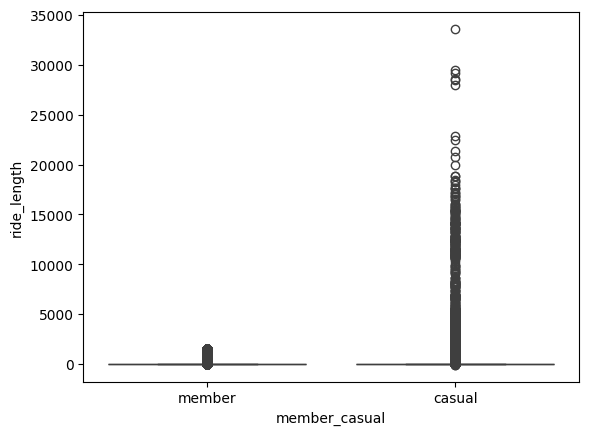

In [38]:
# Let's create a boxplot of ride length to see the data between annual member and casual Rider.

sns.boxplot(data = df, x ='member_casual', y = 'ride_length', order = ['member', 'casual'])

## We can see that casual members use bike for more duration than annual members. 

In [63]:
# Now, let's distinguish data set more by creating  year, month  and week day column.

df['year'] = df['started_at'].dt.year
df['month'] = df['started_at'].dt.month
df['weekday'] = df['started_at'].dt.weekday  # Monday=0, Sunday=6
df['hour'] = df['started_at'].dt.hour

In [47]:
# Viewing our dataset with new columns
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,weekday,month,year
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42+00:00,2023-01-21 20:16:33+00:00,member,10,Saturday,January,2023
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36+00:00,2023-01-10 15:46:05+00:00,member,8,Tuesday,January,2023
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57+00:00,2023-01-02 08:05:11+00:00,casual,13,Monday,January,2023
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58+00:00,2023-01-22 11:01:44+00:00,member,8,Sunday,January,2023
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01+00:00,2023-01-12 14:13:20+00:00,member,15,Thursday,January,2023


# Analyzing and Visualizing data

In [39]:
# let's find out the total number number of rides done by causal and member.

ride_counts_by_type = df['member_casual'].value_counts()
ride_counts_by_type

member_casual
member    1562538
casual     827921
Name: count, dtype: int64

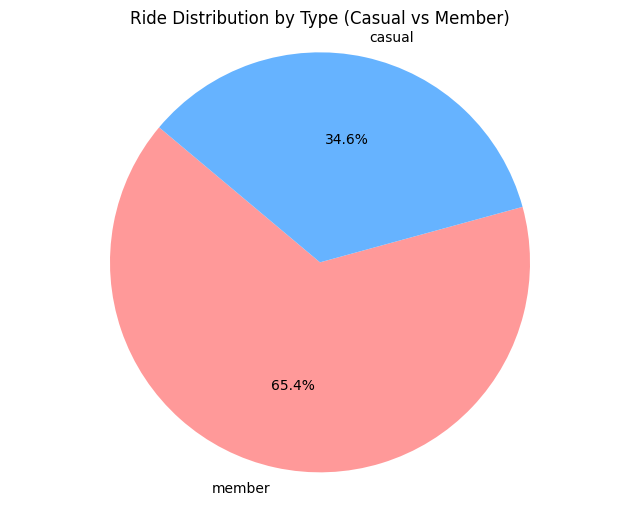

In [40]:
# Visualizing the data

colors = ['#ff9999','#66b3ff']
plt.figure(figsize=(8, 6))
plt.pie(ride_counts_by_type.values, labels=ride_counts_by_type.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.title('Ride Distribution by Type (Casual vs Member)')
plt.show()

### The data shown in the pie chart indicates that Member users had a significantly higher number of rides compared to Casual users.

In [41]:
# Now, let's find out the average ride length between the riders.

average_ride_length = df.groupby('member_casual')['ride_length'].mean()

# Converting average ride length from seconds to minutes for better readability
average_ride_length_minutes = average_ride_length / 60
average_ride_length_minutes

member_casual
casual    0.452029
member    0.192525
Name: ride_length, dtype: float64

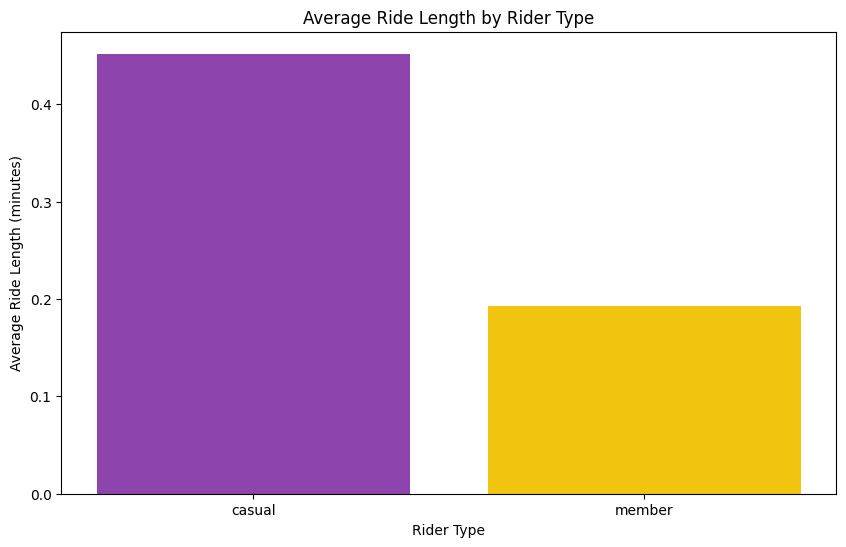

In [42]:
# Visualizing the data

new_colors = ['#8E44AD', '#F1C40F']  # Purple and Yellow

plt.figure(figsize=(10, 6))
plt.bar(average_ride_length_minutes.index, average_ride_length_minutes.values, color=new_colors)
plt.xlabel('Rider Type')
plt.ylabel('Average Ride Length (minutes)')
plt.title('Average Ride Length by Rider Type')
plt.xticks(average_ride_length_minutes.index)
plt.show()

### The above chart indicates that Casual users has more average ride length than the Member users. It could be due to touristic use of the bikes. 

### Members have shorter average ride lengths, it might indicate that they use the service for regular, possibly daily commutes, which tend to be shorter.

In [43]:
# Let's find out which type of bike is used oftenly by users.

ride_counts_by_rideable_type = df.groupby('member_casual')['rideable_type'].value_counts()
ride_counts_by_rideable_type

member_casual  rideable_type
casual         electric_bike    477025
               classic_bike     306990
               docked_bike       43906
member         electric_bike    829084
               classic_bike     733454
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

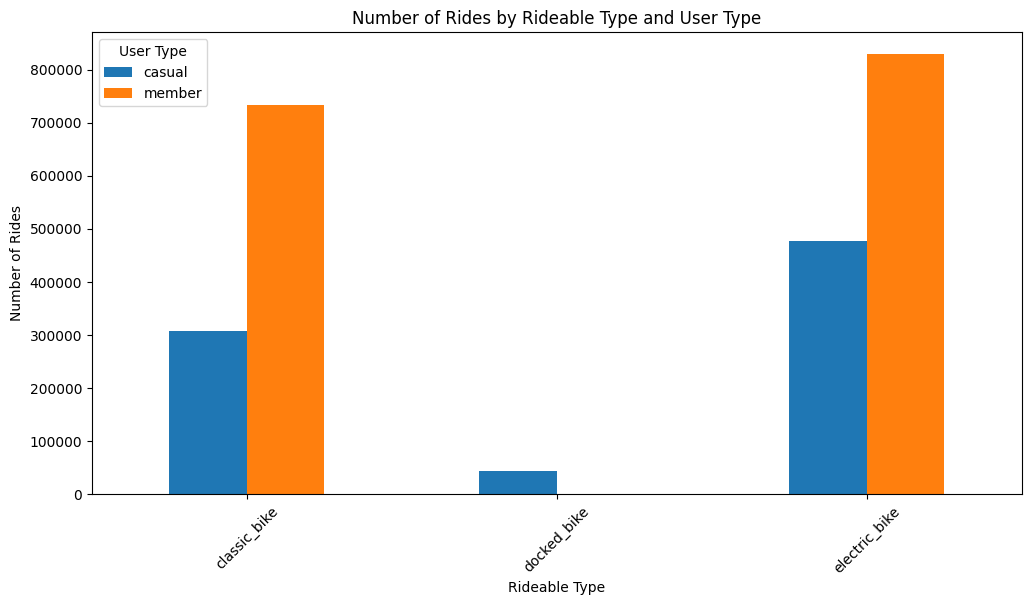

In [68]:
# Visualizing the above data

plt.figure(figsize=(12, 6))
ride_counts_by_rideable_type_df.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Number of Rides by Rideable Type and User Type')
plt.xlabel('Rideable Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.show()

### From this chart, we can find that electric bike is the most used among both casual and member. Classic bike comes in the second place.

### There is a surprising findings from the visualization. Docked bike is only used by Casual users. Members have not used it. It should definitely be focused in the marketing to turn these casual riders into members.


In [66]:
# Let's find out the most popular day of the week

popular_day_of_week = df['weekday'].value_counts().sort_index()

# Mapping weekday numbers to names for better readability
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
popular_day_of_week.index = popular_day_of_week.index.map(days)

popular_day_of_week

weekday
Monday       301499
Tuesday      346932
Wednesday    362762
Thursday     368519
Friday       360875
Saturday     356883
Sunday       292989
Name: count, dtype: int64

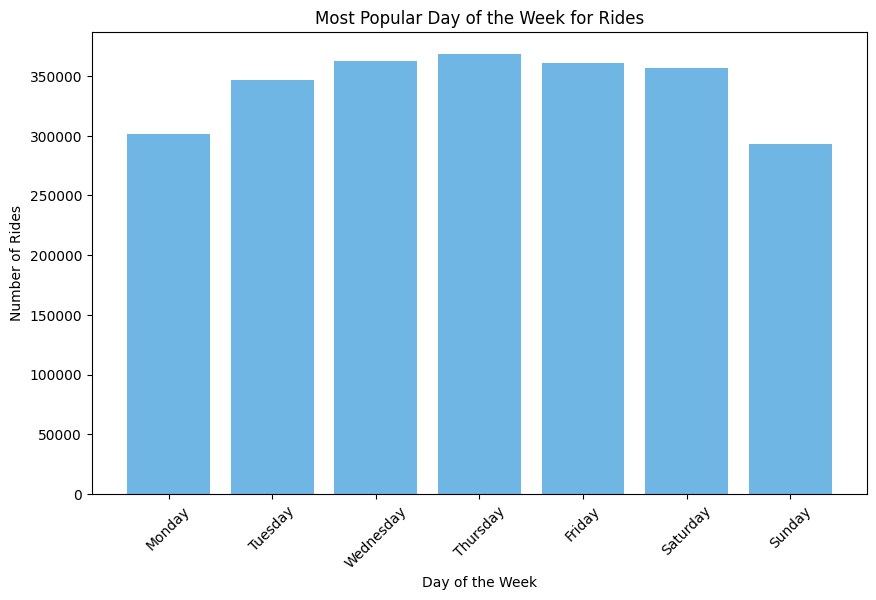

In [67]:
# Visualizing this data

plt.figure(figsize=(10, 6))
plt.bar(popular_day_of_week.index, popular_day_of_week.values, color='#3498db', alpha=0.7)
plt.title('Most Popular Day of the Week for Rides')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

### From this data, Thursday emerges as the most popular day of the week for rides, followed closely by Wednesday and Friday. This information can be useful for planning purposes, such as staffing, bike availability, and targeted marketing campaigns for specific days of the week.

In [90]:
# Let's find out which kind of user rents bike in the specific days of the week.

weekly_member_casual_counts = df.groupby(['weekday', 'member_casual']).size().unstack(fill_value=0)

weekly_member_casual_counts.index = weekly_member_casual_counts.index.map(days)
weekly_member_casual_counts


member_casual,casual,member
weekday,,
Monday,93233,208266
Tuesday,97139,249793
Wednesday,105371,257391
Thursday,113554,254965
Friday,129680,231195
Saturday,162712,194171
Sunday,126232,166757


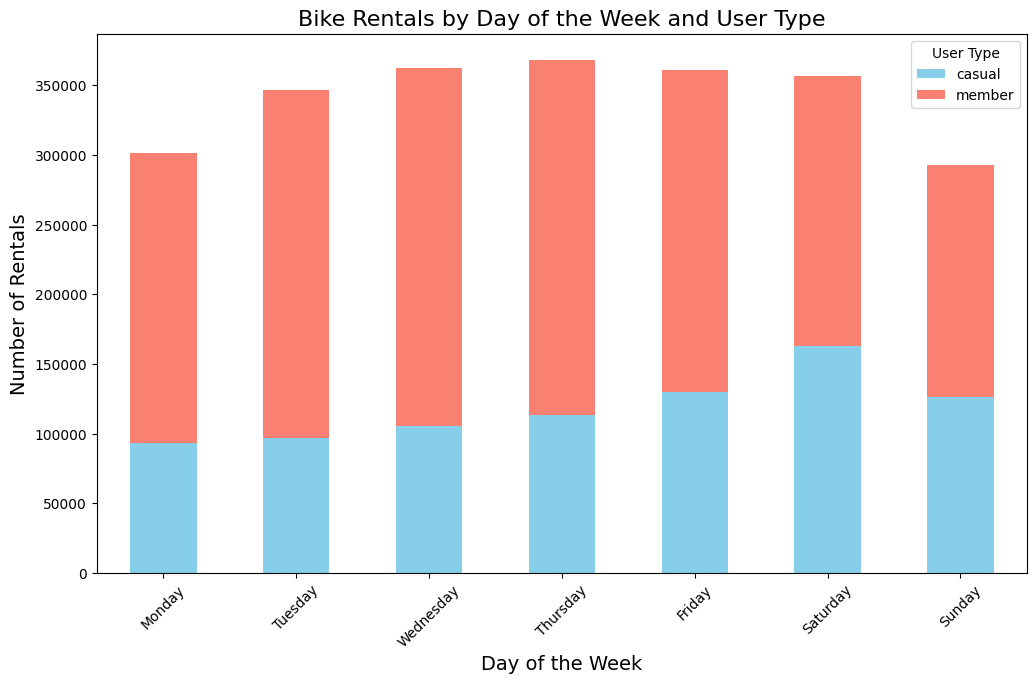

In [91]:
# Visualizing data

plt.figure(figsize=(12, 7))
weekly_member_casual_counts.plot(kind='bar', stacked=True, color=["skyblue", "salmon"], ax=plt.gca())

plt.title('Bike Rentals by Day of the Week and User Type', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Rentals', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='User Type')

plt.show()

### The chart displays bike rental counts categorized by user type across the week. It reveals that Thursday emerges as the most popular day of the week for members, followed closely by Wednesday and Friday. Whereas for casual, Saturdays show the more activity, followed closely by Sunday and Friday.

In [70]:
# Let's find out the most popular month for bike rentals.

popular_month = df['month'].value_counts().idxmax()

# Also calculating the count for the most popular month
popular_month_count = df['month'].value_counts().max()

popular_month, popular_month_count

(6, 719618)

C:\Users\Bisal\AppData\Local\Temp\ipykernel_5764\1376079396.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="viridis")


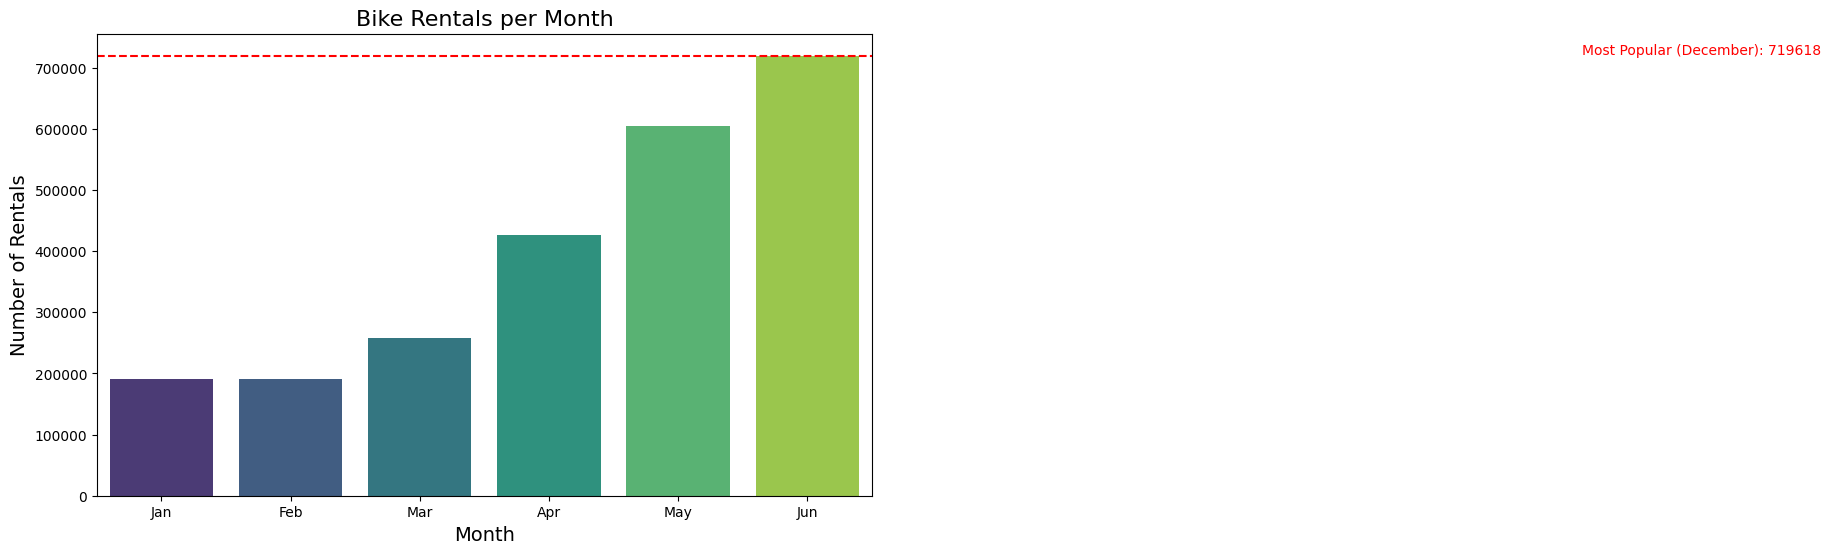

In [79]:
# Visualizing the data

# Recalculating the monthly rental counts
monthly_counts = df['month'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="viridis")

plt.title('Bike Rentals per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Rentals', fontsize=14)
plt.xticks(range(0, 6), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

# Highlighting the most popular month (December)
plt.axhline(popular_month_count, color='red', linestyle='--')
plt.text(11, popular_month_count + 2000, f'Most Popular (June): {popular_month_count}', color='red')

plt.show()


### The most popular month for bike rentals in your dataset is June (month 06), with a total of 719,618 rentals recorded during that month

In [95]:
# Displaying the rental count for each month, broken down by user type

monthly_member_casual_counts = df.groupby(['month', 'member_casual']).size().unstack(fill_value=0)
monthly_member_casual_counts

member_casual,casual,member
month,,
1,40008,150293
2,43016,147429
3,62201,196477
4,147285,279305
5,234181,370646
6,301230,418388


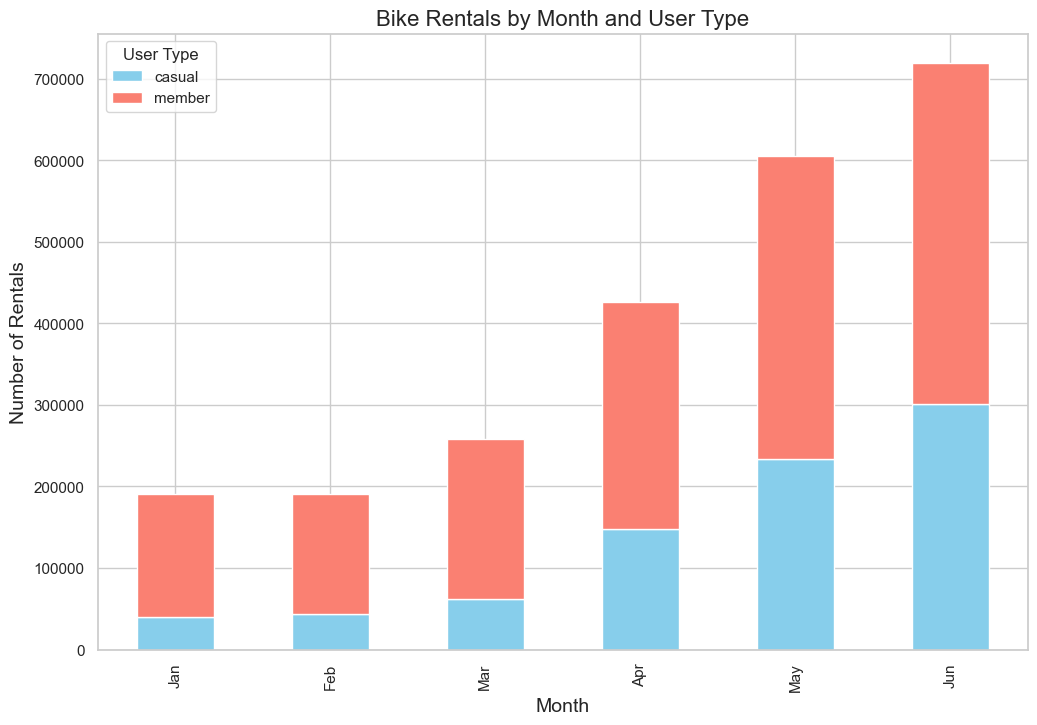

In [98]:
# visualizing the data

plt.figure(figsize=(12, 8))
monthly_member_casual_counts.plot(kind='bar', stacked=True, color=["skyblue", "salmon"], ax=plt.gca())

plt.title('Bike Rentals by Month and User Type', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Rentals', fontsize=14)
plt.xticks(range(0, 6), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
plt.legend(title='User Type')
plt.show()

### Things to consider from this chart:

#### The number of rentals peaks in June for both Member and Casual users, indicating a high preference for bike usage during this month followed by May.

#### Throughout the year, Member users consistently rent more bikes than Casual users.

#### Interestingly, the Casual user all time low is February, suggesting that this month might have something or weather conditions conducive to not prefer casual biking.

#### Similarly January and February stands out as the least active month for bike rentals for both user types. This could be attributed to various factors.

# Conclusion

### This analysis provided valuable insights into the bike rental patterns. Key takeaways includes:

#### a. Causal riders have more average ride length than Member riders.

#### b. Member users have a significantly higher number of rides compared to Casual users.

#### c. Electric bike is the most used bike among both Casual and Members.

#### d. Docked bike is only used by Casual users. Members have not used it.

#### e. Causal riders have more average ride length than Member riders.

#### f. Member users have a significantly higher number of rides compared to Casual users.

#### g. June and May are the most popular months for bike rentals, attracting both regular members and casual users.

#### h. January and February stands out as the least active month for bike rentals for both user types.

#### i. Thursday emerges as the most popular day of the week for Members, followed closely by Wednesday and Friday.

#### j. Saturdays is the most popular day for Casuals, followed closely by Sunday and Friday.

# Recommendations for converting Casual riders into Members.

#### a. Introduce loyalty programs that reward frequent usage with points that can be redeemed for free rides or discounts.

#### b. Offer discounted rates for long-term memberships (e.g., annual plans) to casual users who rent frequently.

#### c. Share testimonials and success stories from current members to demonstrate the value of membership.

#### d. Actively seek feedback from casual riders to understand their needs and preferences, and use this information to improve services.

#### e. Create a sense of community among members through social rides, events, or online forums.

#### f. Partner with local businesses to offer joint promotions, like discounts at coffee shops or stores for bike rental members.

#### g. Develop a mobile app that offers a seamless booking experience, real-time bike availability, and easy access to membership plans.

#### h. Introduce trial memberships that allow casual riders to experience the benefits of being a member for a limited time.

#### By implementing these strategies, this company can create a more attractive and compelling proposition for casual riders to become members. It's important to continuously monitor the effectiveness of these strategies and adapt them based on rider feedback and evolving market trends.

# Marketing strategy to convert Casual riders into Members.

#### a. Emphasize the long-term savings of a membership over casual riding costs.

#### b. Utilize platforms like Instagram and Facebook to showcase member testimonials, benefits, and environmental impact.

#### c. Collaborate with local influencers and fitness enthusiasts to promote membership benefits.

#### d. Host community events like group rides, safety workshops, and environmental awareness campaigns.

#### e. Use local newspapers, radio, and community bulletin boards for advertising.

#### f. Implement a referral program where existing members get rewards for bringing in new members.

#### g.  Offer a week or one-month trial membership for casual riders.

#### h. Use ride data to personalize communication and offers based on rider behavior and preferences.

#### i.  Sponsor local events and festivals to increase brand visibility and promote memberships.

#### j. Conduct surveys to assess the impact of marketing efforts and gather customer insights.